In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
from itertools import combinations
from random import randrange

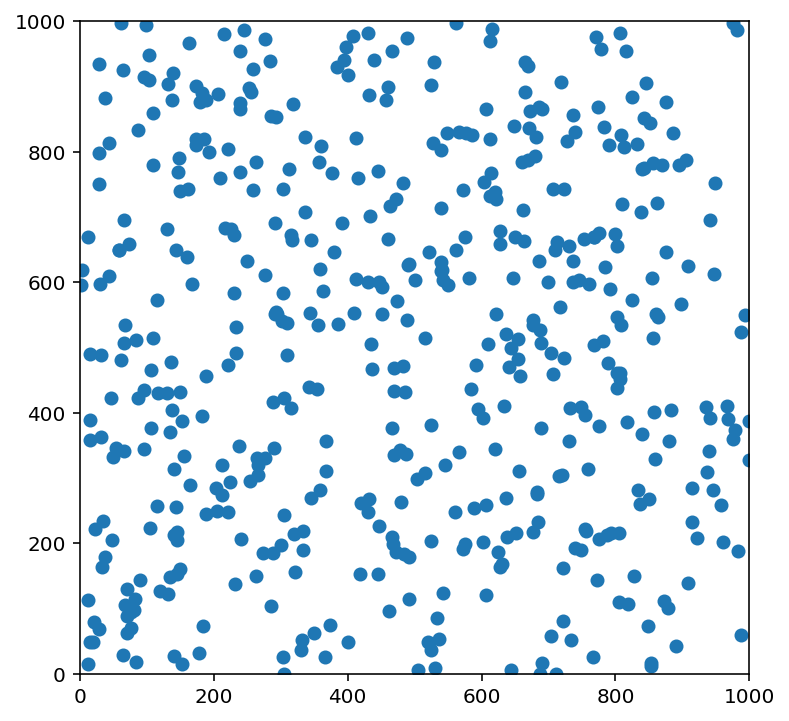

In [2]:
X = np.random.randint(0, 1000, 1000).reshape(-1, 2)
m = X.shape[0]
plt.figure(figsize=(6,6))
plt.xlim(0,1000)
plt.ylim(0,1000)
plt.scatter(X[:, 0], X[:, 1]);

In [3]:
def kld(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

In [4]:
def distance(x1, x2):
    return np.linalg.norm(x1 - x2)

In [5]:
# Optimal Exhaustive Search through all Pair-Wise combinations
def eliminate(X):
    keep = np.ones(len(X), dtype='uint8')
    distances = [(x1, distance(X[x1], X[x2])) for x1, x2 in combinations(range(len(X)), 2)]
    distances.sort(key=lambda x: x[1])
    for idx, d in distances[:2]:
        keep[idx] = 0
    return X[keep == 1]

In [6]:
# Stochastic Subsampling Search to scale to large training sets
def eliminate(X):
    len_X = len(X)
    keep = np.ones(len_X, dtype='uint8')
    distances = []
    for _ in range(2000):
        x1, x2 = (randrange(len_X), randrange(len_X))
        if x1 == x2: continue
        distances.append((x1, distance(X[x1], X[x2])))
    distances.sort(key=lambda x: x[1])
    for idx, d in distances[:2]:
        keep[idx] = 0
    return X[keep == 1]

In [7]:
X1 = X.copy()
%time while len(X1) > 50: X1 = eliminate(X1)

CPU times: user 3.41 s, sys: 13.7 ms, total: 3.43 s
Wall time: 3.42 s


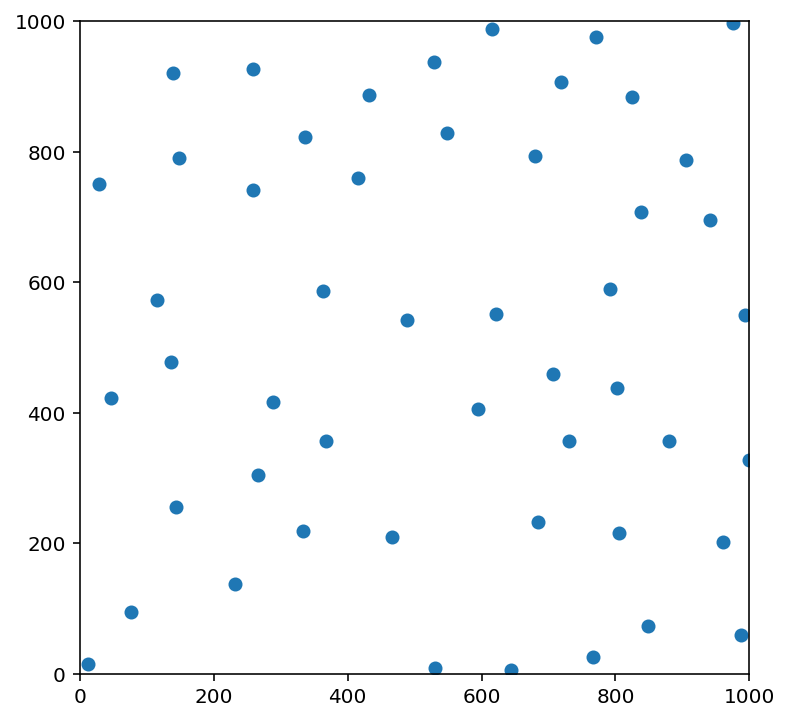

In [8]:
plt.figure(figsize=(6,6))
plt.xlim(0,1000)
plt.ylim(0,1000)
plt.scatter(X1[:, 0], X1[:, 1]);

- Above shows 500 features (points) reduced to 50 'landmark' features using the L2^2 similarity metric